#### 데이터의 속성을 특성
#### 하나의 이미지는 몇개의 특성....  100 X 100  즉 한개의 이미지는 10000개의 픽셀로 이루어진 데이터
#### 특성의 개수는 10000
#### 이러한 특성을 차원이라고 함
#### 데이터를 가장 잘 나타내는 일부 특성을 선택 - 차원 축소 알고리즘
#### 원복이 가능해야함...
#### 주성분 분석-- PCA
#### 분산이 큰 방향을 찾는 과정, 분산: 데이터가 퍼져있는 정도를 

In [15]:
! pip install wget
import wget
url= 'https://bit.ly/fruits_300_data'
wget.download(url)

100% [..........................................................................] 3000128 / 3000128

'fruits_300_data'

In [16]:
# 주어진 데이터가 3차원  300 100 100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fruits =  np.load('fruits_300_data')
fruits.shape, type(fruits)

((300, 100, 100), numpy.ndarray)

In [17]:
fruits2 = fruits.reshape(-1,100*100)
fruits2.shape

(300, 10000)

In [18]:
from sklearn.decomposition import PCA
# n_components : 주성분의 수
pca =  PCA(n_components=50)
pca.fit(fruits2)

PCA(n_components=50)

In [19]:
pca.components_.shape

(50, 10000)

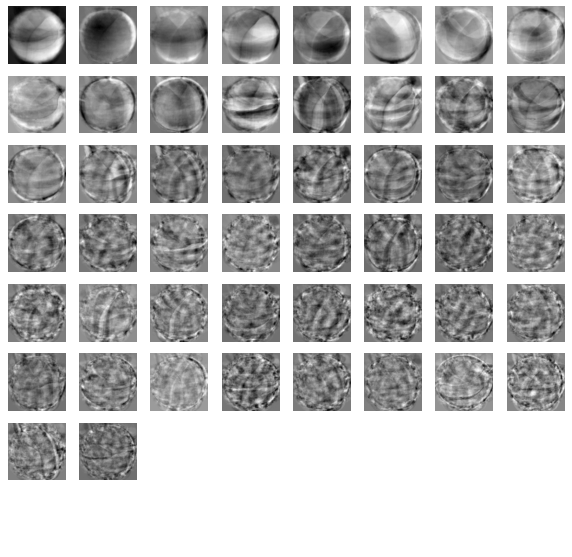

In [20]:
# pca.components_[0].reshape(-1,100,100)[0]
# pca.components_[49].reshape(-1,100,100)[0]
# plt.imshow(pca.components_[49].reshape(-1,100,100)[0],cmap="gray_r")

fig, axs =  plt.subplots(8,8, figsize=(10,10))
count = 0
for i in range(8):
    for j in range(8):
        if(count < 50):
            axs[i,j].imshow(pca.components_[i*8+j].reshape(-1,100,100)[0], cmap='gray_r')
        axs[i,j].axis('off')
        count += 1
plt.show()  

In [21]:
# 주성분을 이제 원본 데이터에 적용해서 차수를 줄여준다
fruitPca =  pca.transform(fruits2)

In [22]:
fruitPca.shape

(300, 50)

In [23]:
# 손실이 없을수 없으며... 10000 -> 50으로 줄이면서 어느정도 손실이 발생
# 그러면 원복...... 
fruitPcaInverse =  pca.inverse_transform(fruitPca)
fruitPcaInverse.shape

(300, 10000)

In [24]:
tryOriginal = fruitPcaInverse.reshape(-1,100,100)
tryOriginal.shape

(300, 100, 100)

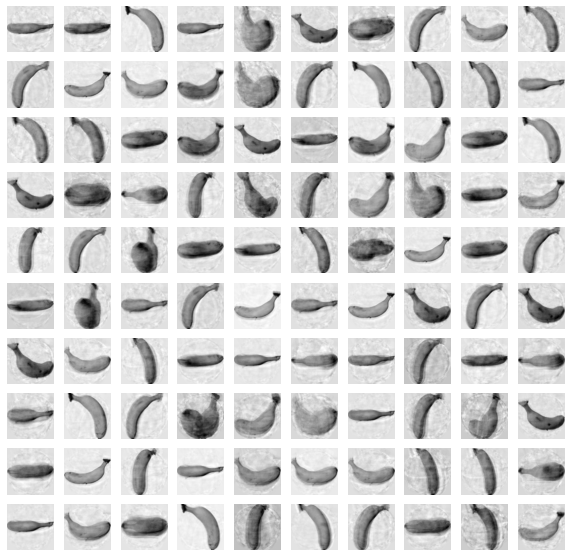

In [25]:
fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(tryOriginal[i*10+j+200], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()
    

In [26]:
# 설명된 분산
pca.explained_variance_ratio_.sum()
# 92프로가 넘는 분산을 유지한다.

0.9214694797374483

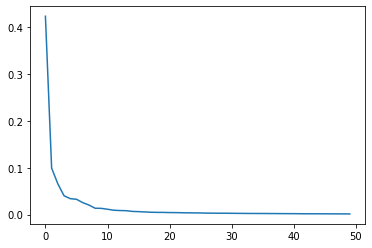

In [27]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

##### 대략 처음10개의 주성분이 대부분의 분산을 차지한다.

In [28]:
# 분류알고리즘을 이용해서 축소한거랑 원본일때랑 잘 분류하는지 비교  지도학습

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)

In [46]:
y = np.array([0]*100+[1]*100+[2]*100)

In [47]:
x = fruits2
# 원본검증
from sklearn.model_selection import cross_validate
cv= cross_validate(lr,x,y)
cv['test_score'].mean(), cv['fit_time'].mean()

(0.9966666666666667, 0.4094569206237793)

In [48]:
cv2= cross_validate(lr,fruitPca,y)
cv2['test_score'].mean(), cv2['fit_time'].mean()

(1.0, 0.02018418312072754)

In [49]:
# PCA는 차수를 낮춰주는데.. 특성을최대한 반영(분산)
# 속도증가. 정확도 증가.
cv2

{'fit_time': array([0.02097321, 0.01898193, 0.01597619, 0.01899052, 0.02599907]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [50]:
# 분산의 갯수를 줄수도 있는데 비율도 줄수있다.
# 정수 : 줄이고자하는 차수,, 실수 : 비율   0.5  설명된 분산의 50% 달하도록 주성분을 찾는
pca05 =  PCA(n_components=0.5)
pca05.fit(fruits2)

PCA(n_components=0.5)

In [51]:
pca05.n_components_  # 머신러닝 내부의 값ㅇ
#pca05.n_components #머신러닝의 파라메터 값

2

In [52]:
# 위의 데이터는 2개의 특성만으로 50%를 표현할수 있다

In [53]:
pca05 =  PCA()

In [54]:
pca05.n_components = 0.5

In [55]:
pca05.fit(fruits2)
pca05.n_components_

2

In [56]:
# 50%로 축소했을때 주성분은 2개가 되었고 그러면... 검증....
fruits_05 =  pca05.transform(fruits2)
fruits_05.shape

(300, 2)

In [57]:
x = fruits_05 # 50% 축소해서 주성분이 2개나 나온 x 데이터
cv= cross_validate(lr,x,y)
cv['test_score'].mean(), cv['fit_time'].mean()

(0.9966666666666667, 0.03590388298034668)

In [58]:
from sklearn.cluster import KMeans

In [59]:
km =  KMeans(n_clusters=3, random_state=42)
km.fit(x)

KMeans(n_clusters=3, random_state=42)

In [63]:
np.unique( km.labels_, return_counts=True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

In [65]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

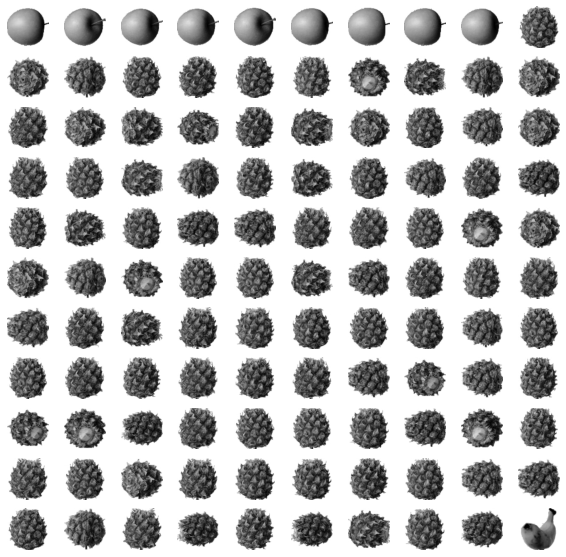

In [75]:
11*10
# km.labels_ == 0
# plt.imshow(fruits[0],cmap='gray_r' )

target = fruits[km.labels_ == 0]

fig, axs =  plt.subplots(11,10, figsize=(10,10))
for i in range(11):
    for j in range(10):
        axs[i,j].imshow(target[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

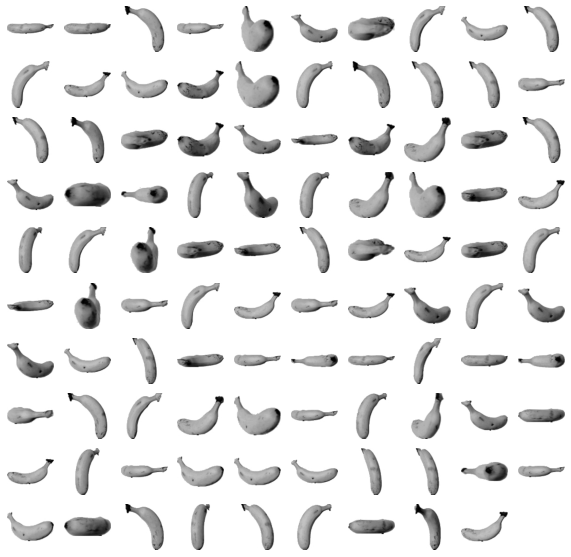

In [77]:
target = fruits[km.labels_ == 1]

fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        if i*10+j < 99:
            axs[i,j].imshow(target[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

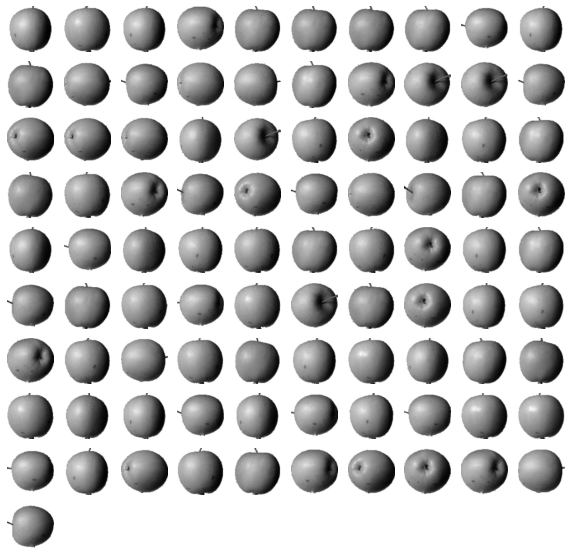

In [78]:
target = fruits[km.labels_ == 2]

fig, axs =  plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        if i*10+j < 91:
            axs[i,j].imshow(target[i*10+j], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()